# Bodediagramm

Gegeben ist das System 1. Ordnung

$$H(s) = \frac{7}{1 + s \cdot 1 \text{ ms}}$$

Von diesem System soll der Frequenzgang mit Hilfe des Bodediagramms analysiert werden.

1. Erstellen Sie ein tf Objekt dieses Systems in der Variablen H.
2. Stellen Sie das Bodediagramm dieses Systems in `figure(1)` dar. Verwenden Sie dazu die Funktion `bodeplot()`.
3. Berechnen Sie die 3 dB Grenzfrequenz (in Hz) und speichern Sie diese in der Variablen f_3dB.
4. In vielen Fällen ist die Darstellung des Bodediagramms aus 2. zu unflexibel. Deswegen ist es sinnvoller, den Betragsfrequenzgang und den Phasengang über die Funktion `bode()` zu ermitteln, und mit diesen Werten das Bodediagramm darzustellen. Versuchen Sie mit dieser Methode, ein ähnliches Bild (`figure(2)`) wie in 2. zu erzeugen.

Optionale Aufgaben:

1. Die Darstellung des Bodediagramms aus `figure(1)` lässt sich tatsächlich noch weiter gestalten. Dazu gibt es die Funktion `bodeoptions()`, die ein Objekt erzeugt um das Bodediagramm anpassen zu können. In diesem Objekt können nun verschiedene Optionen eingestellt werden. Damit diese Optionen wirksam werden, wird dieses Objekt einfach als weiterer Parameter der Funktion `bodeplot()` übergeben.
2. Erweitern Sie `figure(2)`, um die 3 dB Grenzfrequenz dort darzustellen.

3dB-Grenzfrequenz: 1558.87 Hz


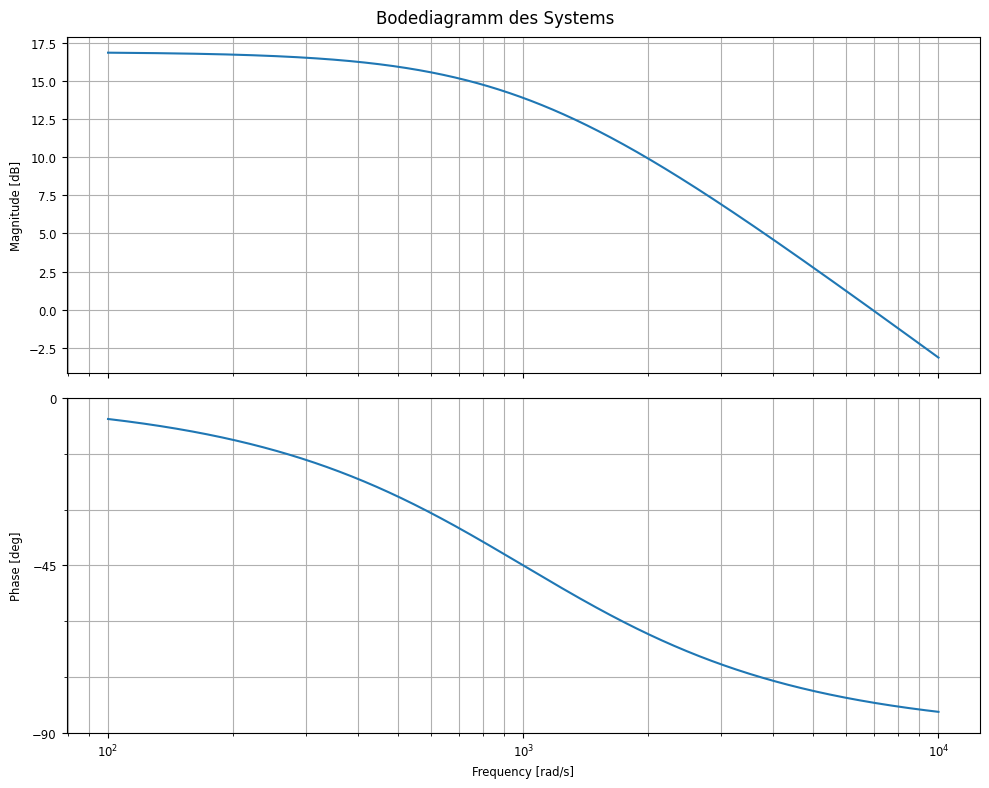

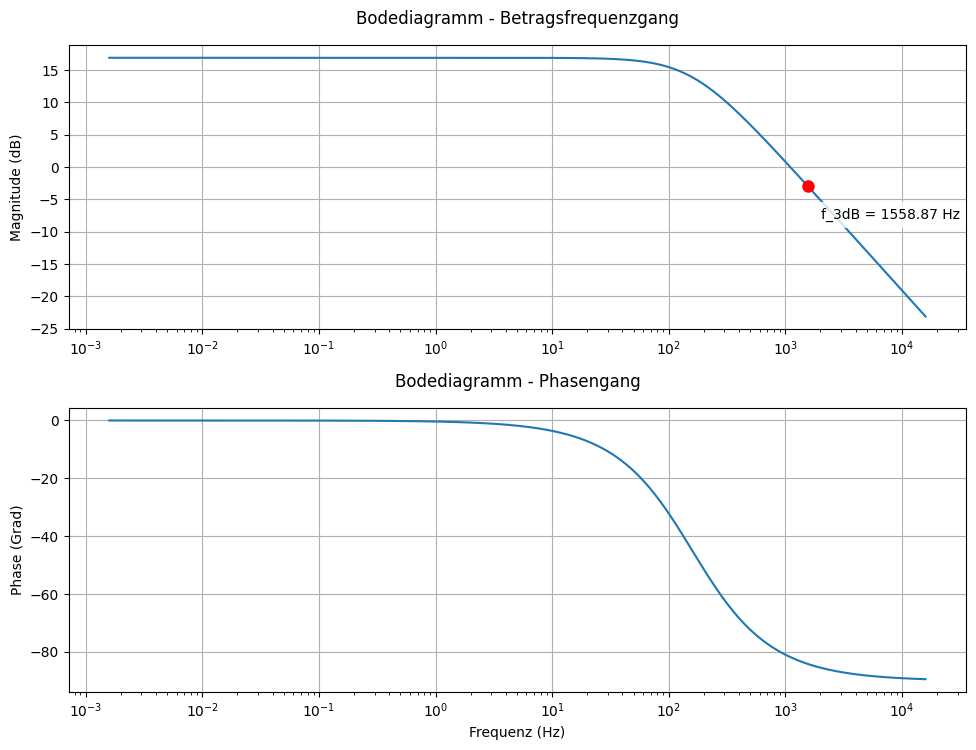

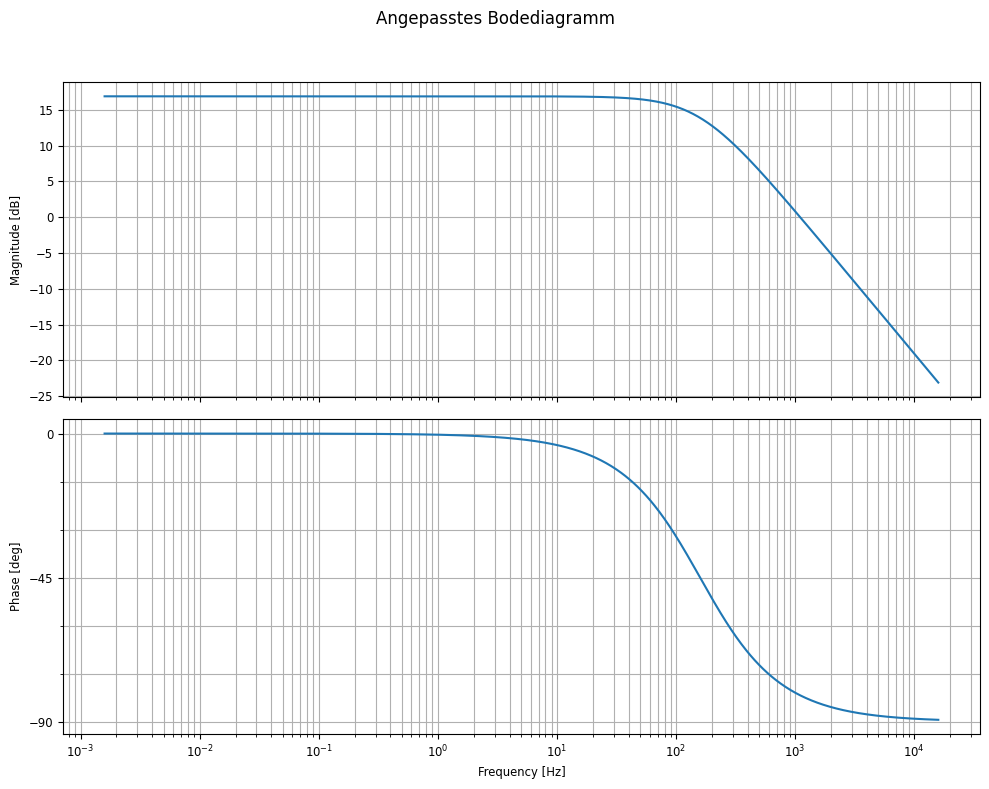

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Übertragungsfunktion erstellen
s = ctrl.tf('s')
H = 7 / (1 + s * 1e-3)

# Frequenzbereich definieren
omega = np.logspace(-2, 5, 1000)

# Erstes Diagramm - Direktes Bode-Diagramm mit control-Bibliothek
plt.figure(1, figsize=(10, 8))
# bode_plot-Funktion direkt verwenden
ctrl.bode_plot(H, dB=True)
plt.suptitle('Bodediagramm des Systems')

# 3dB-Grenzfrequenz berechnen - mit frequency_response
freq_resp = ctrl.frequency_response(H, omega)
mag = np.abs(freq_resp.fresp)  # Amplituden extrahieren
# Sicherstellen, dass mag ein eindimensionales Array ist
mag = np.squeeze(mag)  # Entfernt Achsen mit Dimension 1
mag_db = 20 * np.log10(mag)    # Umwandlung in dB
idx = np.argmin(np.abs(mag_db - (-3)))
w_3dB = omega[idx]
f_3dB = w_3dB / (2 * np.pi)
print(f"3dB-Grenzfrequenz: {f_3dB:.2f} Hz")

# Zweites Diagramm - Manuelles Bode-Diagramm
plt.figure(2, figsize=(10, 8))

# Frequenzantwortdaten erhalten
freq_hz = omega / (2 * np.pi)
phase = np.angle(freq_resp.fresp)  # Phase extrahieren
phase = np.squeeze(phase)  # Sicherstellen, dass phase eindimensional ist

# Vertikalen Abstand zwischen Unterplots erhöhen
plt.subplots_adjust(hspace=0.4)

# Amplitudengang
plt.subplot(211)
plt.semilogx(freq_hz, mag_db)
plt.grid(True)
plt.title('Bodediagramm - Betragsfrequenzgang', pad=15)
plt.ylabel('Magnitude (dB)')
plt.xlabel('')  # X-Achsenbeschriftung entfernen, nur im unteren Plot anzeigen

# 3dB-Punkt im Amplitudengang markieren
plt.plot(f_3dB, -3, 'ro', markersize=8)
# Textposition anpassen, um Überlappung zu vermeiden
plt.text(f_3dB*1.3, -8, f'f_3dB = {f_3dB:.2f} Hz', 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# Phasengang
plt.subplot(212)
plt.semilogx(freq_hz, phase * 180 / np.pi)  # Umwandlung in Grad
plt.grid(True)
plt.title('Bodediagramm - Phasengang', pad=15)
plt.ylabel('Phase (Grad)')
plt.xlabel('Frequenz (Hz)')

# Layout anpassen für bessere Darstellung
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Drittes Diagramm - Angepasstes Bode-Diagramm
plt.figure(3, figsize=(10, 8))
# Empfohlene bode_plot-Funktion verwenden, Hz=True für Frequenz in Hz
_ = ctrl.bode_plot(H, omega=omega, dB=True, Hz=True, grid=True)
plt.suptitle('Angepasstes Bodediagramm', y=0.98)
plt.subplots_adjust(hspace=0.4)  # Unterplot-Abstand erhöhen
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Layout anpassen

plt.show()